<a href="https://colab.research.google.com/github/van-dang/MRI-Cloud/blob/master/PeriodicBarriers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the code

In [0]:
# This program solves the Bloch-Torrey equation applied to computational diffusion MRI using 
# the finite element method coupled with the theta-method for the spatial discretization.

# The scope of usage: 
# (1) Single domains, Multilayered structures, manifolds
# (2) Membrane permeability for internal interfaces
#     Artificial permeability at the external interfaces
# (3) pure homogeneous Neumann BCs, (4) pseudo-periodic BCs

# Copyright (C) 2019 Van-Dang Nguyen (vdnguyen@kth.se)

# This file is part of DOLFIN.

# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.

# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.

# First added:  2017-10-10
# Last changed: 2019-04-25

# This demo is maintained by Van-Dang Nguyen
# Please report possible problems to vdnguyen@kth.se

# Setting a working environment with FEniCS

In [17]:
# !rm *.py *.xml *.txt *.zip *.pvd *.vtu *.geo *.msh
try:
    from google.colab import files
except:
    print("This is not google.colab")
    
import platform, sys
python_version=platform.python_version()
from distutils.version import LooseVersion, StrictVersion

if ( LooseVersion(python_version) < LooseVersion("3.0.0")):
    print("Python3 is needed!");
    print("How to fix: Runtime/Change_runtime_type/Python 3");
    sys.exit()
    
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics
    from dolfin import *; from mshr import *

gmsh_dir=!which gmsh
if len(gmsh_dir)==0:
    !sudo apt-get update
    !sudo apt-get install -y gmsh
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil

dolfin_version = dolfin.__version__
print ('dolfin version:', dolfin_version)

# Disable warnings
import logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger("rothemain.rothe_utils")
logging.getLogger('UFL').setLevel(logging.WARNING)
logging.getLogger('FFC').setLevel(logging.WARNING)

import warnings
warnings.filterwarnings("ignore")


This is not google.colab
dolfin version: 2019.1.0


#Load pre-defined functions

In [0]:
import sympy as sp  
exists = os.path.isfile('DmriFemBuitInFunc.py')
isupdate = False
if (exists==False or isupdate==True):
    if isupdate==True:
        !rm DmriFemBuitInFunc.py
    print("Load pre-defined functions from GitHub")
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/master/DmriFemBuitInFunc.py
from DmriFemBuitInFunc import *

# Working on the mesh

In [19]:
mesh_name = "CirclesInSquare"
is_partition_function_exist = os.path.isfile('GetPartitionMarkers.py')
if is_partition_function_exist==False:
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/mesh/GetPartitionMarkers.py

is_geo_file_exist = os.path.isfile(mesh_name+'.geo')  
if is_geo_file_exist==False:
    !wget --quiet https://raw.githubusercontent.com/van-dang/MRI-Cloud/mesh/$mesh_name''.geo

# Create mesh from geo file by gmsh
!gmsh -2 $mesh_name''.geo -o $mesh_name''.msh


# Convert .msh to .xml using dolfin-convert
!dolfin-convert $mesh_name''.msh $mesh_name''.xml
clear_output()

mymesh = Mesh(mesh_name+".xml");  

from GetPartitionMarkers import *

GetPartitionMarkers(mesh_name+".msh", "pmk_"+mesh_name+".xml")

partition_marker = MeshFunction("size_t", mymesh, mymesh.topology().dim())

File("pmk_"+mesh_name+".xml")>>partition_marker

cellmarker, phase, partition_marker, partion_list = Create_phase_func(mymesh, None, partition_marker)    

File("Phase.pvd")<<phase


Extracting cell markers from: CirclesInSquare.msh ...
Extracted successfully on: 6614 elements
Partition marker list: ['1', '0']
Wrote to: pmk_CirclesInSquare.xml


# Solve the Bloch-Torrey equation

Function Space for Two-compartment Domains has 4 components
(ur0, ui0, ur1, ur1): r-real, i-imaginary
Initialize peridodic function spaces.
The pseudo-periodic BCS are strongly imposed.
The mesh needs to be periodic.
t:   0.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 0.00%
t: 500.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 4.95%
t: 1000.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 9.90%
t: 1500.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 14.85%
t: 2000.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 19.80%
t: 2500.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 24.75%
t: 3000.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 29.70%
t: 3500.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 34.65%
t: 4000.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 39.60%
t: 4500.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 44.55%
t: 5000.00  T: 10000.00 dt: 100.0 qvalue: 1.095445e-04 Completed 49.

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


save to log.txt


DEBUG:matplotlib.axes._base:update_title_pos


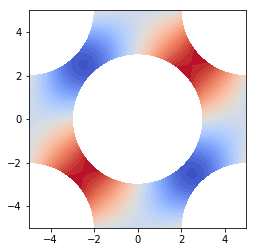

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


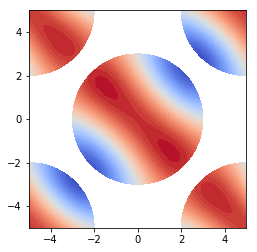

In [30]:
mri_simu = MRI_simulation()
mri_para = MRI_parameters()

#### 
def Post_processing(mydomain, mri_para, mri_simu, plt, ms=''):
    comm = MPI.comm_world
    rank = comm.Get_rank()    

    one = Function(mydomain.V)
    one.vector()[:] = 1
    whole_vol = assemble(one*dx)
    voi = assemble(mri_simu.Dirac_Delta*dx)
    if mydomain.IsDomainMultiple == True:
        u0r_0, u0i_0, u1r_0, u1i_0 = split(mri_simu.u_0)
        initial0 = assemble((1-mydomain.phase)*mri_simu.Dirac_Delta*dx);
        signal0 = assemble(((1-mydomain.phase)*u0r_0)*dx);
        initial1 = assemble(mydomain.phase*mri_simu.Dirac_Delta*dx)
        signal1 = assemble((mydomain.phase*u1r_0)*dx);
        signal = assemble((mydomain.phase*u1r_0+(1-mydomain.phase)*u0r_0)*dx);
        out_text = 'b: %.3f, g: %.3f, q: %.3e, Signal: %.3e, Normalized signal: %.6e, kappa: %.3e, dt: %.3f, hmin: %.3e, hmax: %.3e, whole_vol: %.3f, vol_of_interest: %.3f, Free signal: %.3e, elasped time %.3f (s)\n'%(mri_para.bvalue, mri_para.gvalue, mri_para.qvalue, signal, signal/voi, mydomain.kappa, mri_simu.k, mydomain.hmin, mydomain.hmax, whole_vol, voi, exp(-mri_para.bvalue*mydomain.D0), mri_simu.elapsed_time)
        if rank==0:
            print('Signal on each compartment')
            print('Sum initial0: %.3e, Signal0: %.3e'%(initial0, signal0))
            print('Sum initial1: %.3e, Signal1: %.3e'%(initial1, signal1))
            print(out_text)
        try:               
            dm = mydomain.V_DG.dofmap()
            mydomain.mphase = MeshFunction("size_t", mydomain.V_DG.mesh(), mydomain.V_DG.mesh().topology().dim())
            for cell in cells(mydomain.V_DG.mesh()):
                  mydomain.mphase[cell] = mydomain.phase.vector()[dm.cell_dofs(cell.index())]
                
            mydomain.mesh0 = SubMesh(mydomain.mymesh, mydomain.mphase, 0)
            mydomain.mesh1 = SubMesh(mydomain.mymesh, mydomain.mphase, 1)
            
            V0 = FunctionSpace(mydomain.mesh0, mydomain.Ve);
            V1 = FunctionSpace(mydomain.mesh1, mydomain.Ve);
            u0r_0p = project(u0r_0,V0)
            u1r_0p = project(u1r_0,V1)
            u0i_0p = project(u0i_0,V0)
            u1i_0p = project(u1i_0,V1)
            
            if mydomain.tdim==mydomain.gdim and not(plt==None):
                plt.figure(10000);
                plot(u0r_0p, cmap="coolwarm")
                plt.figure(10001);            
                plot(u1r_0p, cmap="coolwarm")  
            File("u0r.pvd")<<u0r_0p
            File("u1r.pvd")<<u1r_0p
            File("u0i.pvd")<<u0i_0p
            File("u1i.pvd")<<u1i_0p
        except:
            print("Could not post-process the solutions for the visualization purposes due to some reasons.")
    else:
        ur, ui = split(mri_simu.u_0)
        signal = assemble(ur*dx);
        out_text = 'b: %.3f, g: %.3f, q: %.3e, Signal: %.3e, Normalized signal: %.6e, dt: %.3f, hmin: %.3e, hmax: %.3e, whole_vol: %.3f, vol_of_interest: %.3f, Free signal: %.3e, elasped time %.3f (s)\n'%(mri_para.bvalue, mri_para.gvalue, mri_para.qvalue, signal, signal/voi, mri_simu.k, mydomain.hmin, mydomain.hmax, whole_vol, voi, exp(-mri_para.bvalue*mydomain.D0), mri_simu.elapsed_time)
        if rank==0:
            print(out_text)
        V = FunctionSpace(mydomain.mymesh,mydomain.Ve);
        ur_p = project(ur,V)
        if mydomain.tdim==mydomain.gdim and not(plt==None): 
            plt.figure(10000);
            plot(ur_p, cmap="coolwarm")
        File("ur.pvd")<<ur_p
        
    if int(rank) == 0:
        print("save to log.txt")
        outfile = open('log.txt', 'a')
        if not(ms == ''):
            outfile.write('%'+ms+'\n')
        outfile.write(out_text)
        outfile.close()

####

bvalues = [1000]
signals = [];
for bvalue in bvalues:
    #################################################################################
    #########################  Pre-defined parameters ###############################
    mri_para.stype='PGSE'                                # sequence type
    mri_para.bvalue = bvalue;                            # bvalue
    mri_para.delta, mri_para.Delta = 5000, 5000           # time sequence
    mri_para.set_gradient_dir(mymesh, 1, 1, 0)           # gradient direction

    mri_para.T = mri_para.Delta+mri_para.delta
    mri_para.fs_sym = sp.Piecewise(
                    (  1., mri_para.s < mri_para.delta ),
                    (  0., mri_para.s < mri_para.Delta ),
                    ( -1., mri_para.s < mri_para.T ),
                    (  0., True )  
                ) 


    mri_para.Apply()
    mri_simu.k = 100;                                    # time-step size
    mri_simu.nskip = 5;                                  # frequency to print ouputs
    mydomain = MyDomain(mymesh, mri_para)
    mydomain.phase = phase 
    mydomain.PeriodicDir = [1, 1, 0];             # Direction of the periodicity
    mydomain.IsDomainPeriodic = True              # Confirm if the mesh if periodic
    mydomain.IsDomainMultiple = True             # Confirm if the mesh is multiple
    ################################################################################
    mydomain.kappa_e_scalar = 5e-5;
    mydomain.kappa = 1e-5;
    mydomain.Apply()   # Call Apply before setting the diffusion tensor
    ################################################################################
    # Impose the diffusion coefficient
    mydomain.D0 = 3e-3
    mydomain.D  = mydomain.D0;
    #################################################################################

    # linsolver = PETScLUSolver("mumps")
    linsolver = KrylovSolver("bicgstab")

    mri_simu.solve(mydomain, mri_para, linsolver)

    ctext = ""
    if bvalue==0:
        ctext = "2D realistic neuron, kcoeff=3e-3, delta=10600us, Delta=43100us, dt=200us, gdir=100"
    Post_processing(mydomain, mri_para, mri_simu, plt, ctext)
    